In [1]:
cd d:\0python\PHM\CAICT2017

d:\0python\PHM\CAICT2017


## 导入包

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import tensorflow as tf

## 导入数据

In [3]:
dataIn15 = pd.read_csv('train/15/15_data.csv')
normalPer15 = pd.read_csv('train/15/15_normalInfo.csv')
failurePer15 = pd.read_csv('train/15/15_failureInfo.csv')
timeIn15 = dataIn15['time']
dataIn21 = pd.read_csv('train/21/21_data.csv')
normalPer21 = pd.read_csv('train/21/21_normalInfo.csv')
failurePer21 = pd.read_csv('train/21/21_failureInfo.csv')
timeIn21 = dataIn21['time']
dataIn08 = pd.read_csv('test/08/08_data.csv')

In [4]:
normalPer15.head()

,startTime,endTime
0,2015-11-01 20:20:16,2015-11-03 23:47:32
1,2015-11-04 14:04:51,2015-11-04 18:26:08
2,2015-11-05 11:06:59,2015-11-09 02:44:31
3,2015-11-09 12:30:09,2015-11-09 19:23:32
4,2015-11-10 00:04:50,2015-11-15 23:03:06


## 数据预处理， 标记正反例

In [4]:
def dataPreProcess(data, oktime, ngtime):
    for index, row in ngtime.iterrows():
        data.loc[(data['time']>=row[0]) & (data['time']<=row[1]),'label']=1

    for index, row in oktime.iterrows():
        data.loc[(data['time']>=row[0]) & (data['time']<=row[1]),'label']=0

In [5]:
def dataPreProcess(dataIn, timeIn, normalPer, failurePer):
    dataIn['label'] = -1
    for i in range(len(timeIn)):
        for j in range(len(normalPer)):
            if timeIn[i] >= normalPer.loc[j]['startTime'] and timeIn[i] <= normalPer.loc[j]['endTime']:
                dataIn['label'] = 0
        for j in range(len(failurePer)):
            if timeIn[i] >= failurePer.loc[j]['startTime'] and timeIn[i] <= failurePer.loc[j]['endTime']:
                dataIn['label'] = 1
    return dataIn

In [10]:
def featProcess(dataIn):
    pass

In [5]:
# data15 = dataPreProcess(dataIn15, timeIn15, normalPer15, failurePer15)
# data21 = dataPreProcess(dataIn21, timeIn21, normalPer21, failurePer21)
dataPreProcess(dataIn15, normalPer15, failurePer15)
dataPreProcess(dataIn21, normalPer21, failurePer21)
label15 = dataIn15['label']
label21 = dataIn21['label']

In [6]:
data15_1 = dataIn15[label15 == 1]
data15_0 = dataIn15[label15 == 0]
len_1 = len(data15_1)
len_0 = len(data15_0)

In [7]:
data21_1 = dataIn21[label21 == 1]
data21_0 = dataIn21[label21 == 0]
# len_1 = len(data21_1)
# len_0 = len(data21_0)

In [8]:
data15_0 = data15_0.sample(len_1)
data15_0 = data15_0.loc[:, ['wind_speed', 'power', 'wind_direction', 'environment_tmp', 'label']]
data15_1 = data15_1.loc[:, ['wind_speed', 'power', 'wind_direction', 'environment_tmp', 'label']]

In [52]:
dataIn15.columns

Index(['time', 'wind_speed', 'generator_speed', 'power', 'wind_direction',
       'wind_direction_mean', 'yaw_position', 'yaw_speed', 'pitch1_angle',
       'pitch2_angle', 'pitch3_angle', 'pitch1_speed', 'pitch2_speed',
       'pitch3_speed', 'pitch1_moto_tmp', 'pitch2_moto_tmp', 'pitch3_moto_tmp',
       'acc_x', 'acc_y', 'environment_tmp', 'int_tmp', 'pitch1_ng5_tmp',
       'pitch2_ng5_tmp', 'pitch3_ng5_tmp', 'pitch1_ng5_DC', 'pitch2_ng5_DC',
       'pitch3_ng5_DC', 'group', 'label'],
      dtype='object')

In [10]:
# dataIn = pd.concat([data15_0, data15_1])
# X = dataIn.loc[:, ['wind_speed', 'power', 'wind_direction', 'environment_tmp']]
# y = dataIn['label']
dataIn = pd.concat([data15_0, data21_0, data15_1, data21_1])
X = dataIn.loc[:, ['wind_speed', 'power', 'wind_direction', 'environment_tmp']]
y = dataIn['label']

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
data15_0 = data15_0[data15_0['power'] < 2.0]

In [9]:
data21_0 = data21_0[data21_0['power'] < 2.0]

In [11]:
X.shape

(515481, 4)

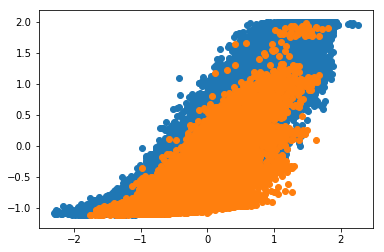

In [13]:
plt.scatter(data15_0['wind_speed'], data15_0['power'])
plt.scatter(data15_1['wind_speed'], data15_1['power'])
plt.show()

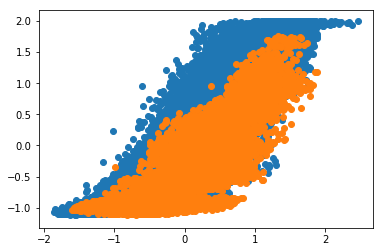

In [106]:
plt.scatter(data21_0['wind_speed'], data21_0['power'])
plt.scatter(data21_1['wind_speed'], data21_1['power'])
plt.show()

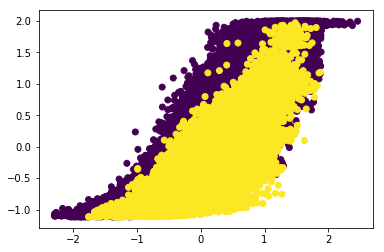

In [173]:
plt.scatter(X['wind_speed'], X['power'], c=y)
plt.show()

In [22]:
svc = SVC(kernel='rbf')

In [23]:
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [24]:
svc.score(X_test, y_test)

0.86795019357538972

In [183]:
knn = KNeighborsClassifier(n_neighbors=5)

In [184]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [190]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [192]:
cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')

array([ 0.96779825,  0.96762852,  0.96881517,  0.96748145,  0.96862117,
        0.9697124 ,  0.96917891,  0.96862117,  0.96842718,  0.96857268])

In [69]:
y_predict = knn.predict(X_test)

In [185]:
knn.score(X_train, y_train)

0.97722753550089236

In [ ]:
dataX = featProcess()
datay =
testX = featProcess(dataIn08)

In [194]:
k_range = range(3, 20)
k_score = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    k_score.append(cross_val_score(knn, X, y, cv=10, scoring='accuracy'))

In [195]:
k_mean = []
for item in k_score:
    k_mean.append(item.mean())

In [196]:
k_score[10]

array([ 0.93398514,  0.9678746 ,  0.94595329,  0.91179095,  0.88628075,
        0.93984248,  0.93974548,  0.94506091,  0.95413983,  0.93049197])

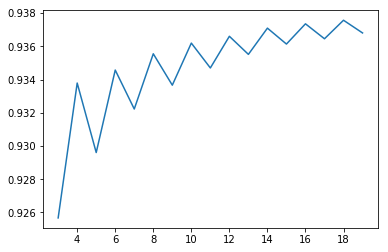

In [197]:
plt.plot(k_range, k_mean)
plt.show()
k_best = k_range[np.array(k_mean).argmax()]

In [12]:
n_inputs = 4
n_classes = 2 

X_data =tf.placeholder(tf.float32, [None, n_inputs], name='X_data')
Y_data =tf.placeholder(tf.float32, [None, n_classes], name='Y_data')

W = {
    'w1': tf.Variable(tf.random_normal([n_inputs,12]), name='w1'),
    'w2': tf.Variable(tf.random_normal([12,24]), name='w2'),
    'w3': tf.Variable(tf.random_normal([24, 12]), name='w3'),
    'w4': tf.Variable(tf.random_normal([12, 6]), name='w4'),
    'w5': tf.Variable(tf.random_normal([6, n_classes]), name='w5'),
}

B = {
    'b1': tf.Variable(tf.random_normal([12]), name='b1'),
    'b2': tf.Variable(tf.random_normal([24]), name='b2'),
    'b3': tf.Variable(tf.random_normal([12]), name='b3'),
    'b4': tf.Variable(tf.random_normal([6]), name='b4'),
    'b5': tf.Variable(tf.random_normal([n_classes]), name='b5'),
}


with tf.name_scope("L1"):
    H1 = tf.matmul(X_data, W['w1']) + B['b1'] 
    H1 = tf.nn.relu(H1)

with tf.name_scope("L2"):
    H2 = tf.matmul(H1, W['w2']) + B['b2'] 
    H2 = tf.nn.relu(H2)
    
with tf.name_scope("L3"):
    H3 = tf.matmul(H2, W['w3']) + B['b3'] 
    H3 = tf.nn.relu(H3)
    
with tf.name_scope("L4"):
    H4 = tf.matmul(H3, W['w4']) + B['b4'] 
    H4 = tf.nn.relu(H4)
    
with tf.name_scope('L5'):
    pred = tf.matmul(H4, W['w5']) + B['b5']
    pred_softmax = tf.nn.softmax(pred, name="pred_softmax")

with tf.name_scope('loss_and_acc'):
    correct_pred = tf.equal(tf.argmax(pred_softmax, 1), tf.argmax(Y_data, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=pred, labels=Y_data))

In [13]:
a = tf.random_uniform([3, 2])
init = tf.global_variables_initializer()
sess = tf.Session()
# merged = tf.summary.merge_all()
writer = tf.summary.FileWriter("logs/", sess.graph)
sess.run(init)
# sess.run(tf.local_variables_initializer())
# sess.run(tf.equal(1, 1))
# sess.run(a)

In [14]:
learning_rate = 0.1
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
for i in range(100):
    # training
    rnd_idx = np.random.choice(X.shape[0], 300000, replace=False)
    X_sample = X.iloc[rnd_idx]
    y_sample = np.eye(2)[y.iloc[rnd_idx].values.astype(int)]
    _, acc, loss1, corr= sess.run([train_step, accuracy, loss, correct_pred], feed_dict={X_data: X_sample, Y_data:y_sample})
#     sess.run(train_step, feed_dict={xs: x_data, ys: y_data})
    print(i, 'accuracy:', acc, 'loss:', loss1)
    if i % 10 ==0:
        print(corr)

0 accuracy: 0.635243 loss: 5.56904
[ True False  True ..., False False False]
1 accuracy: 0.9329 loss: 4.08161
2 accuracy: 0.663393 loss: 1.82518
3 accuracy: 0.93231 loss: 1.79136
4 accuracy: 0.932967 loss: 0.466656
5 accuracy: 0.93271 loss: 0.429719
6 accuracy: 0.93308 loss: 0.411469
7 accuracy: 0.932983 loss: 0.393096
8 accuracy: 0.933373 loss: 0.378384
9 accuracy: 0.932867 loss: 0.368164
10 accuracy: 0.932593 loss: 0.362003
[ True  True  True ..., False  True  True]
11 accuracy: 0.932857 loss: 0.354194
12 accuracy: 0.9331 loss: 0.345652
13 accuracy: 0.933607 loss: 0.338958
14 accuracy: 0.933493 loss: 0.331448
15 accuracy: 0.933523 loss: 0.325876
16 accuracy: 0.932713 loss: 0.323051
17 accuracy: 0.93276 loss: 0.319117
18 accuracy: 0.932693 loss: 0.313676
19 accuracy: 0.932867 loss: 0.308046
20 accuracy: 0.933183 loss: 0.301843
[ True  True  True ...,  True  True  True]
21 accuracy: 0.93347 loss: 0.295891
22 accuracy: 0.933197 loss: 0.29237
23 accuracy: 0.93269 loss: 0.291423
24 accur